

# Question 7

Using your function, construct Recovery Curves split by year of default ("Default Vintage")

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../case')
from portfolio_model import Loans_Portfolio

In [1]:
mystyle = '../style/pastel-light.mplstyle'
plt.style.use(mystyle)
%config InlineBackend.figure_format='retina'


pd.options.mode.copy_on_write = True 
pd.options.display.float_format = "{:,.2f}".format

In [2]:
cob = datetime.date(2022, 12, 31) # 31/12/2022
ss_path = '../data/2024_Strat_Casestudy.xlsx'

In [3]:
portfolio = Loans_Portfolio(cob_date=cob, data_path=ss_path)

In [4]:
RC = portfolio.construct_recovery_curve()  # This will be a bit slow the first time it runs since it has to create the enriched data first.

In [5]:
RC.head()

months_since_default
-67   0.00
-66   0.00
-65   0.00
-64   0.00
-63   0.00
dtype: float64

Let's plot this only for the time after default, i.e. when number of months is positve.

In [6]:
RC[RC.index > 0]

months_since_default
1    0.00
2    0.00
3    0.22
4    0.43
5    0.49
6    0.55
7    0.67
8    0.68
9    0.70
10   0.73
11   0.73
12   0.76
13   0.76
14   0.74
15   0.73
16   0.72
17   0.73
18   0.73
19   0.75
20   0.73
21   0.73
22   0.73
23   0.68
24   0.09
25   0.09
26   0.10
dtype: float64

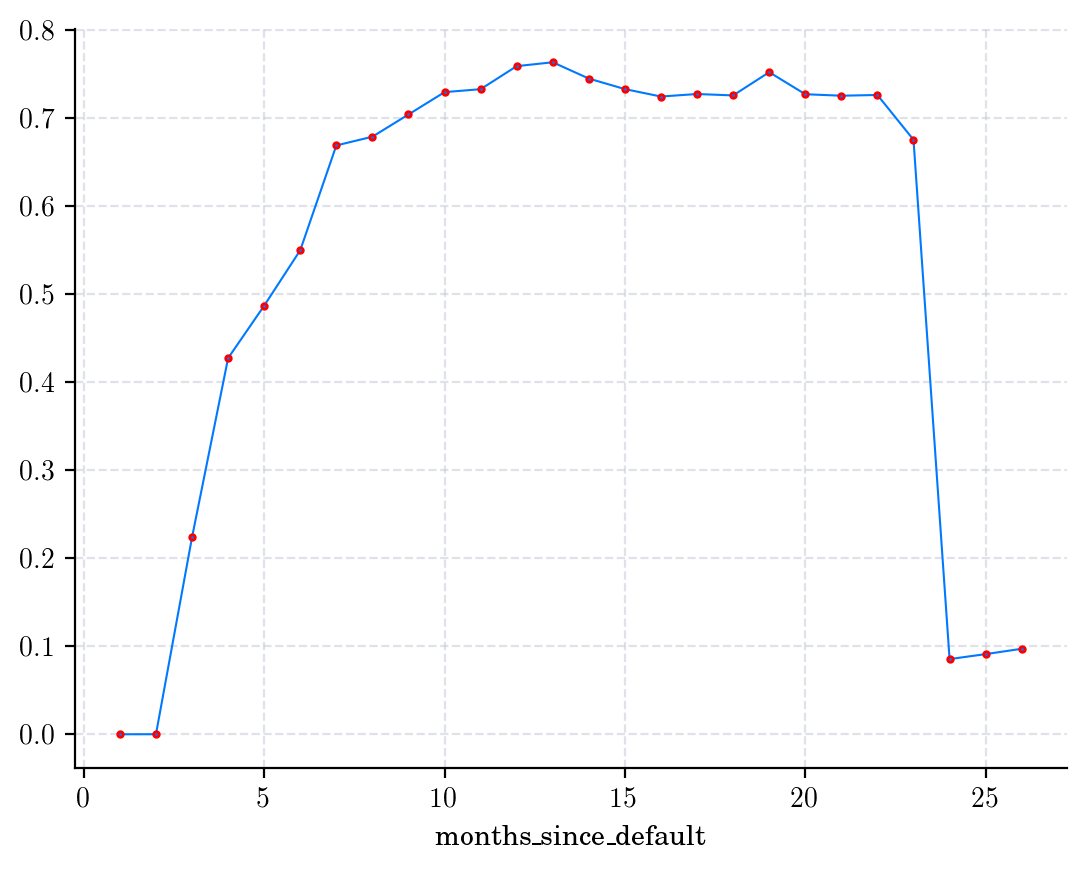

In [7]:
RC[RC.index > 0].plot(style='-o', ms=2, mec='r')
plt.show()

In [8]:
RC_by_default_year = portfolio.construct_recovery_curve(pivots=['year_of_default'])

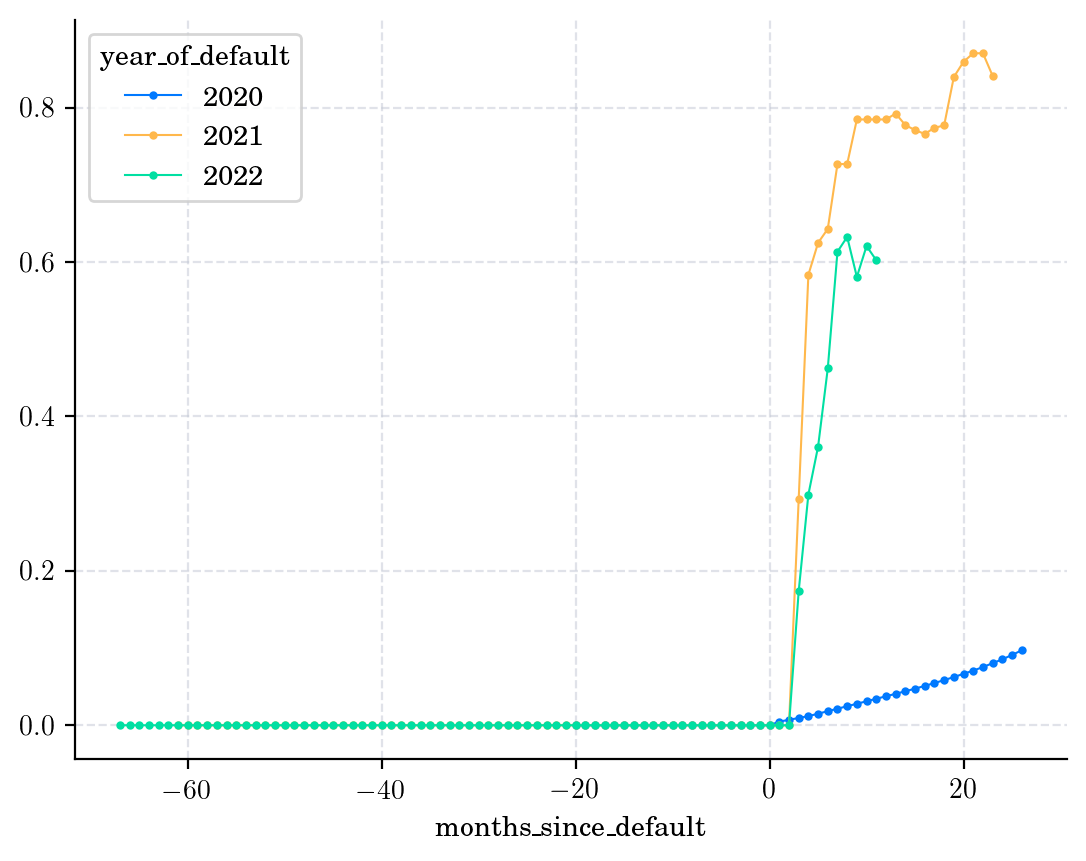

In [9]:
RC_by_default_year.plot(style='-o', ms=2,)
plt.show()

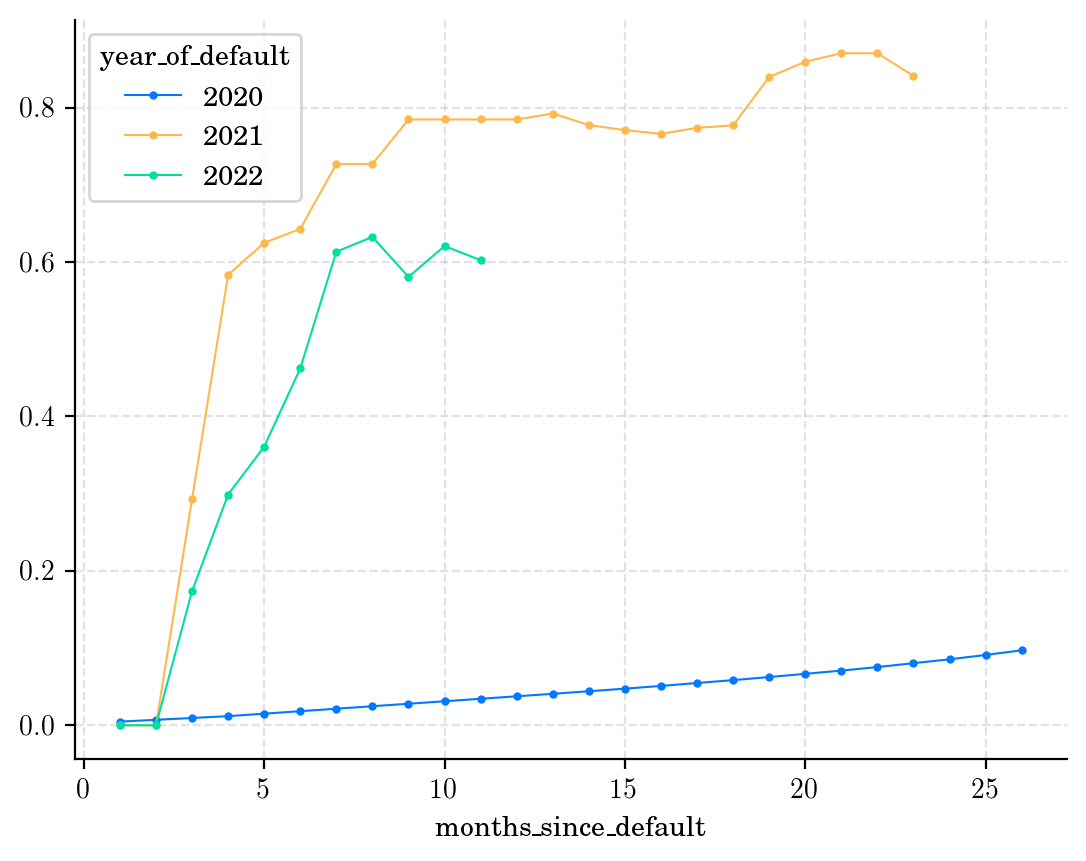

In [10]:
RC_by_default_year[RC_by_default_year.index > 0].plot(style='-o', ms=2)
plt.show()

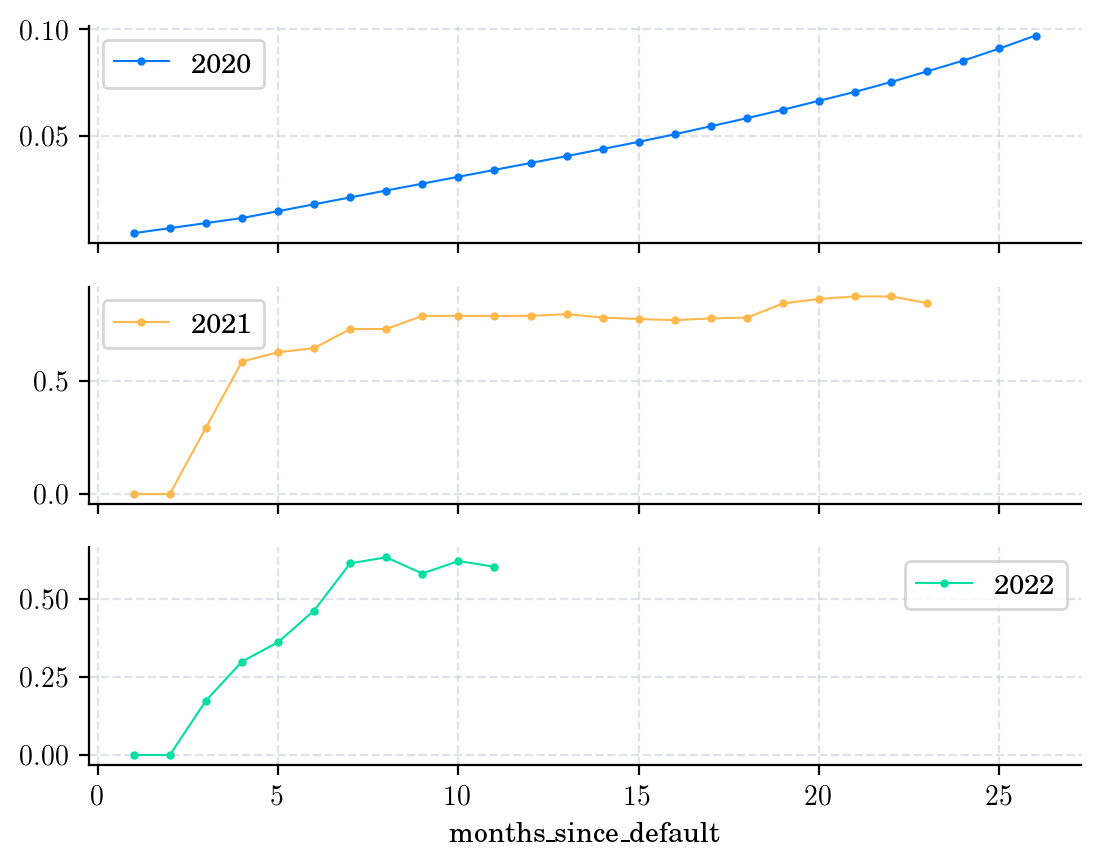

In [11]:
RC_by_default_year[RC_by_default_year.index > 0].plot(subplots=True, style='-o', ms=2)
plt.show()

In [12]:
RC_by_default_year[RC_by_default_year.index > 0]

year_of_default,2020,2021,2022
months_since_default,,,
1,0.00,0.00,0.00
2,0.01,0.00,0.00
3,0.01,0.29,0.17
4,0.01,0.58,0.30
5,0.02,0.62,0.36
6,0.02,0.64,0.46
7,0.02,0.73,0.61
8,0.02,0.73,0.63
9,0.03,0.78,0.58
